<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Cleaning-column-names" data-toc-modified-id="Cleaning-column-names-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cleaning column names</a></span></li><li><span><a href="#Initial-Exploration-and-Cleaning" data-toc-modified-id="Initial-Exploration-and-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Initial Exploration and Cleaning</a></span><ul class="toc-item"><li><span><a href="#Converting-price-and-odometer-to-numeric" data-toc-modified-id="Converting-price-and-odometer-to-numeric-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Converting <code>price</code> and <code>odometer</code> to numeric</a></span></li></ul></li><li><span><a href="#Exploring-odometer_km-and-price-columns" data-toc-modified-id="Exploring-odometer_km-and-price-columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploring <code>odometer_km</code> and <code>price</code> columns</a></span></li><li><span><a href="#Exploring-date-columns" data-toc-modified-id="Exploring-date-columns-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploring date columns</a></span></li><li><span><a href="#Exploring-Price-by-Brand" data-toc-modified-id="Exploring-Price-by-Brand-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exploring Price by Brand</a></span></li><li><span><a href="#Storing-Aggregate-Data-in-a-DataFrame" data-toc-modified-id="Storing-Aggregate-Data-in-a-DataFrame-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Storing Aggregate Data in a DataFrame</a></span></li></ul></div>

# Overview

In this project, we'll clean a dataset of used vehicles that have been put up for sale on eBay in Germany. The dataset contains 50,000 vehicles.and the following fields:

- `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
- `name` - Name of the car.
- `seller` - Whether the seller is private or a dealer.
- `offerType` - The type of listing
- `price` - The price on the ad to sell the car.
- `abtest` - Whether the listing is included in an A/B test.
- `vehicleType` - The vehicle Type.
- `yearOfRegistration` - The year in which which year the car was first registered.
- `gearbox` - The transmission type.
- `powerPS` - The power of the car in PS.
- `model` - The car model name.
- `kilometer` - How many kilometers the car has driven.
- `monthOfRegistration` - The month in which which year the car was first registered.
- `fuelType` - What type of fuel the car uses.
- `brand` - The brand of the car.
- `notRepairedDamage` - If the car has a damage which is not yet repaired.
- `dateCreated` - The date on which the eBay listing was created.
- `nrOfPictures` - The number of pictures in the ad.
- `postalCode` - The postal code for the location of the vehicle.
- `lastSeenOnline` - When the crawler saw this ad last online.

In [1]:
import pandas as pd

In [2]:
autos = pd.read_csv('autos.csv', encoding='Latin-1')

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

- Missing values in `vehicleType`, `gearbox`, `model`, `fuelType` and `notRepairedDamage`. We'll need to investigate these.
- `dateCrawled` and `lastSeen` are dates but have been imported as strings.
- `postalCode` and `yearOfRegistration` imported as an int, but might be better as a categorical variable.
- `price` imported as a string due to $ character, need to convert this field to a numeric. 
- `odometer` imported as string due to km values, need to extract and convert to numeric.
- `name` contains a lot of info about the car, we could extract new fields from this single value.
- The column names use camelcase instead of Python's preferred snakecase, which means we can't just replace spaces with underscores

# Cleaning column names

In [5]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gear_box', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

In [7]:
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


The columns have been renamed to use snake_case and in some cases, given a more appropriate name

# Initial Exploration and Cleaning

In [8]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-08 10:40:35,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


- `seller` and `offer_type` are almost entirely a single value so we can remove these columns as they add no value.
- `nr_of_pictures` has 0 for all records, so we can remove this column.
- `price` and `odometer` are numerical fields that must be converted. 
- `registration_year` and `registration_month` can be convereted to categorical. 

## Converting `price` and `odometer` to numeric

In [9]:
autos["price"].unique()

array(['$5,000', '$8,500', '$8,990', ..., '$385', '$22,200', '$16,995'],
      dtype=object)

Values start with `$` and contain a comma, both must be removed

In [10]:
autos["price"] = (autos["price"]
                  .str.replace("$", "")
                  .str.replace(",", "")
                  .astype(float)
)

In [11]:
autos["price"].head()

0    5000.0
1    8500.0
2    8990.0
3    4350.0
4    1350.0
Name: price, dtype: float64

In [12]:
autos["price"].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [13]:
autos["odometer"].unique()

array(['150,000km', '70,000km', '50,000km', '80,000km', '10,000km',
       '30,000km', '125,000km', '90,000km', '20,000km', '60,000km',
       '5,000km', '100,000km', '40,000km'], dtype=object)

In [14]:
autos["odometer"] = (autos["odometer"]
                  .str.replace(",", "")
                  .str.replace("km", "")
                  .astype(int)
)

In [15]:
autos["odometer"].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer, dtype: int32

In [16]:
autos.rename({"odometer": "odometer_km"}, axis=1, inplace=True)

In [17]:
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990.0,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350.0,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350.0,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


# Exploring `odometer_km` and `price` columns

In [18]:
autos[["price", "odometer_km"]].describe()

,price,odometer_km
count,5.000000e+04,50000.000000
mean,9.840044e+03,125732.700000
std,4.811044e+05,40042.211706
min,0.000000e+00,5000.000000
25%,1.100000e+03,125000.000000
50%,2.950000e+03,150000.000000
75%,7.200000e+03,150000.000000
max,1.000000e+08,150000.000000


Appears to be some unrealistically high prices, as well as a number of vehicles listed with no price. 

In [20]:
print(autos["price"].unique().shape, autos["odometer_km"].unique().shape)

(2357,) (13,)


In [24]:
autos["price"].value_counts().sort_index().head(10)

0.0     1421
1.0      156
2.0        3
3.0        1
5.0        2
8.0        1
9.0        1
10.0       7
11.0       2
12.0       3
Name: price, dtype: int64

In [26]:
autos["price"].value_counts().sort_index().tail(20)

197000.0      1
198000.0      1
220000.0      1
250000.0      1
259000.0      1
265000.0      1
295000.0      1
299000.0      1
345000.0      1
350000.0      1
999990.0      1
999999.0      2
1234566.0     1
1300000.0     1
3890000.0     1
10000000.0    1
11111111.0    2
12345678.0    3
27322222.0    1
99999999.0    1
Name: price, dtype: int64

Probably doesn't make sense to have vehicles with a price greater than $350,000, we'll remove these. Let's investigate the vehicles with price of 0.

In [27]:
autos[autos.price == 0]

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
27,2016-03-27 18:45:01,Hat_einer_Ahnung_mit_Ford_Galaxy_HILFE,privat,Angebot,0.0,control,NaN,2005,NaN,0,NaN,150000,0,NaN,ford,NaN,2016-03-27 00:00:00,0,66701,2016-03-27 18:45:01
71,2016-03-28 19:39:35,Suche_Opel_Astra_F__Corsa_oder_Kadett_E_mit_Re...,privat,Angebot,0.0,control,NaN,1990,manuell,0,NaN,5000,0,benzin,opel,NaN,2016-03-28 00:00:00,0,4552,2016-04-07 01:45:48
80,2016-03-09 15:57:57,Nissan_Primera_Hatchback_1_6_16v_73_Kw___99Ps_...,privat,Angebot,0.0,control,coupe,1999,manuell,99,primera,150000,3,benzin,nissan,ja,2016-03-09 00:00:00,0,66903,2016-03-09 16:43:50
87,2016-03-29 23:37:22,Bmw_520_e39_zum_ausschlachten,privat,Angebot,0.0,control,NaN,2000,NaN,0,5er,150000,0,NaN,bmw,NaN,2016-03-29 00:00:00,0,82256,2016-04-06 21:18:15
99,2016-04-05 09:48:54,Peugeot_207_CC___Cabrio_Bj_2011,privat,Angebot,0.0,control,cabrio,2011,manuell,0,2_reihe,60000,7,diesel,peugeot,nein,2016-04-05 00:00:00,0,99735,2016-04-07 12:17:34
118,2016-03-12 05:03:00,VW_Sharan_V6_204_PS_Karosse_Rohkarosse_mit_Pap...,privat,Angebot,0.0,control,bus,2001,manuell,204,sharan,150000,7,benzin,volkswagen,ja,2016-03-12 00:00:00,0,15370,2016-03-12 21:44:23
146,2016-03-22 23:59:28,Ford_Fiesta_rot,privat,Angebot,0.0,test,kleinwagen,1996,manuell,75,fiesta,20000,8,benzin,ford,NaN,2016-03-22 00:00:00,0,63069,2016-04-01 20:16:38
167,2016-04-02 19:43:45,Suche_VW_Multivan_Innenausstattung_Set_oder_TE...,privat,Angebot,0.0,control,NaN,2011,NaN,0,transporter,5000,0,NaN,volkswagen,NaN,2016-04-02 00:00:00,0,64739,2016-04-06 19:45:08
180,2016-03-19 10:50:25,Zu_verkaufen,privat,Angebot,0.0,test,NaN,2016,manuell,98,3_reihe,150000,12,benzin,mazda,ja,2016-03-19 00:00:00,0,30966,2016-03-24 03:17:21
226,2016-03-25 23:52:12,Porsche_911_S_Targa__67er_SWB,privat,Angebot,0.0,control,cabrio,1967,manuell,160,911,5000,12,benzin,porsche,nein,2016-03-25 00:00:00,0,44575,2016-04-05 14:46:39


In [29]:
autos = autos[autos["price"].between(1,350000, inclusive=True)]

In [35]:
print(autos.shape, autos.price.value_counts().sort_index().head(10), autos.price.value_counts().sort_index().tail(10))

(48565, 20) 1.0     156
2.0       3
3.0       1
5.0       2
8.0       1
9.0       1
10.0      7
11.0      2
12.0      3
13.0      2
Name: price, dtype: int64 197000.0    1
198000.0    1
220000.0    1
250000.0    1
259000.0    1
265000.0    1
295000.0    1
299000.0    1
345000.0    1
350000.0    1
Name: price, dtype: int64


# Exploring date columns

In [36]:
autos[["date_crawled", "ad_created", "last_seen"]].head()

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [41]:
cols = ["date_crawled", "ad_created", "last_seen"]
for c in cols:
    print(autos[c].value_counts(normalize=True, dropna=False).sort_index())

2016-03-05 14:06:30    0.000021
2016-03-05 14:06:40    0.000021
2016-03-05 14:07:04    0.000021
2016-03-05 14:07:08    0.000021
2016-03-05 14:07:21    0.000021
2016-03-05 14:07:26    0.000021
2016-03-05 14:07:40    0.000021
2016-03-05 14:07:45    0.000021
2016-03-05 14:08:00    0.000041
2016-03-05 14:08:05    0.000041
2016-03-05 14:08:27    0.000021
2016-03-05 14:08:42    0.000021
2016-03-05 14:09:02    0.000041
2016-03-05 14:09:05    0.000021
2016-03-05 14:09:20    0.000021
2016-03-05 14:09:22    0.000021
2016-03-05 14:09:38    0.000021
2016-03-05 14:09:46    0.000021
2016-03-05 14:09:56    0.000021
2016-03-05 14:09:57    0.000021
2016-03-05 14:09:58    0.000041
2016-03-05 14:10:18    0.000021
2016-03-05 14:10:20    0.000021
2016-03-05 14:10:46    0.000021
2016-03-05 14:11:03    0.000021
2016-03-05 14:11:05    0.000021
2016-03-05 14:11:14    0.000021
2016-03-05 14:11:15    0.000021
2016-03-05 14:11:25    0.000021
2016-03-05 14:11:40    0.000021
                         ...   
2016-04-

In [42]:
autos.registration_year.describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

- Registration year contains some strange values, min of 1000 and max of 9999 are impossible. Any year of registration above 2016 is invalid as the registration can't be after the listing date. 

In [46]:
autos[~autos.registration_year.between(1900, 2016, inclusive=True)]["registration_year"].value_counts()

2017    1392
2018     470
5000       4
9999       3
2019       2
1800       2
2800       1
6200       1
4500       1
8888       1
4800       1
1000       1
9000       1
1001       1
1111       1
5911       1
4100       1
Name: registration_year, dtype: int64

Let's remove all these rows are the registration year is deemed invalid - we are only considering vehicles whose registration is between 1900 and 2016.

In [47]:
autos = autos[autos.registration_year.between(1900, 2016, inclusive=True)]
autos.shape

(46681, 20)

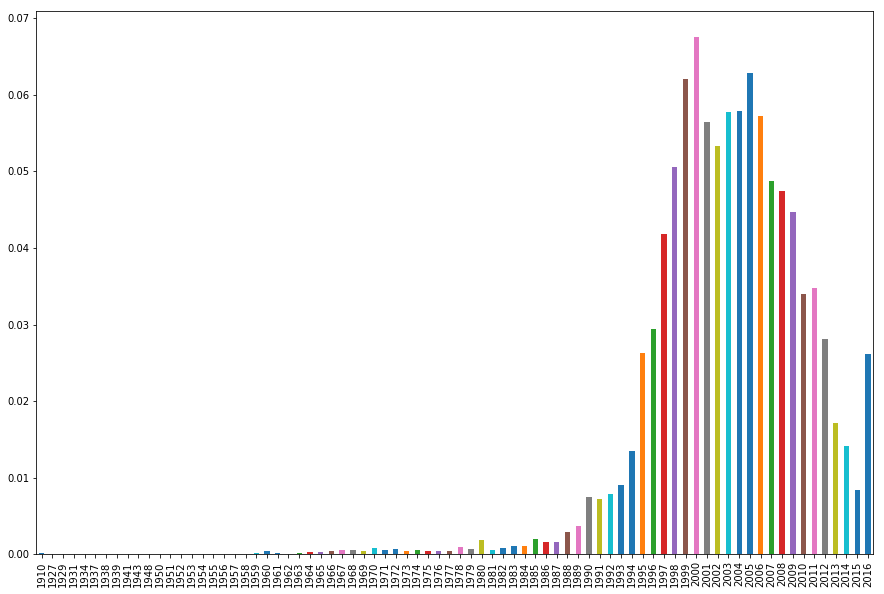

In [55]:
pd.options.display.max_rows = 1000
autos.registration_year.value_counts(normalize=True).sort_index().plot.bar(figsize = (15, 10))

We see the greatest percentage of vehicles where registered in 2000 and generally between 2000 and 2007m prior to the 2008 financial crisis.

# Exploring Price by Brand

In [57]:
autos.brand.value_counts()[:10]

volkswagen       9862
bmw              5137
opel             5022
mercedes_benz    4503
audi             4041
ford             3263
renault          2201
peugeot          1393
fiat             1197
seat              853
Name: brand, dtype: int64

In [58]:
brand_mean_prices = {}
for b in ["volkswagen", "bmw", "opel", "mercedes_benz", "audi", "ford"]:
    brand_mean_prices[b] = autos.loc[autos.brand == b, "price"].mean()

brand_mean_prices

{'volkswagen': 5402.410261610221,
 'bmw': 8332.820517811953,
 'opel': 2975.2419354838707,
 'mercedes_benz': 8628.450366422385,
 'audi': 9336.687453600594,
 'ford': 3749.4695065890287}

The highest mean selling prices are for audi, merc and bmw in that order. 

# Storing Aggregate Data in a DataFrame

In [59]:
brand_mean_mileage = {}
for b in ["volkswagen", "bmw", "opel", "mercedes_benz", "audi", "ford"]:
    brand_mean_mileage[b] = autos.loc[autos.brand == b, "odometer_km"].mean()

brand_mean_mileage

{'volkswagen': 128707.15879132022,
 'bmw': 132572.51313996495,
 'opel': 129310.0358422939,
 'mercedes_benz': 130788.36331334666,
 'audi': 129157.38678544914,
 'ford': 124266.01287159056}

In [60]:
bmp_series = pd.Series(brand_mean_prices)
bmm_series = pd.Series(brand_mean_mileage)

In [61]:
df = pd.DataFrame(bmp_series, columns=['mean_prices'])
df

,mean_prices
volkswagen,5402.410262
bmw,8332.820518
opel,2975.241935
mercedes_benz,8628.450366
audi,9336.687454
ford,3749.469507


In [62]:
df["mean_mileage"] = bmm_series

In [63]:
df

,mean_prices,mean_mileage
volkswagen,5402.410262,128707.158791
bmw,8332.820518,132572.513140
opel,2975.241935,129310.035842
mercedes_benz,8628.450366,130788.363313
audi,9336.687454,129157.386785
ford,3749.469507,124266.012872
